In [2]:
# モジュール・ライブラリのインポート（必ず最初に実行）
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp

# 日本語フォントの設定（Mac:'Hiragino Sans', Windows:'MS Gothic'）
plt.rcParams['font.family'] = 'Hiragino Sans'

# 表記の設定
pd.set_option('display.precision', 3)   # 小数点以下の表示桁
pd.set_option('display.max_rows', 20)  # 表示する行数
pd.set_option('display.max_columns', 10)  # 表示する行数
%precision 3

'%.3f'

In [3]:
# アヤメデータをPandasに読み込む
Iris = pd.read_csv('./Iris.csv')
Iris = Iris.iloc[:, 1:]
Iris.columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']

# 散布図・相関分析による問題解決

## 回帰直線と最小二乗法

### 回帰直線

2つの量的データ $ X, Y $ が与えられたとき，変数 $ X $ の値から $ Y $ の値を予測するための数式のことを**回帰モデル**と呼ぶ．
また，$ X $ を**説明変数**（独立変数），$ Y $ を**目的変数**（従属変数，被説明変数）と呼ぶ．

回帰モデルには様々な種類が存在するが，以下の散布図のように変数 $ X,\ Y $ の間に直線関係が成り立ちそうな場合には，回帰モデルとして1次関数

$$
	\hat{y} = ax + b
$$(eq:regression_line)

を用いるのが妥当である．
このように１次関数による回帰モデルは**単回帰モデル**と呼ばれ，式{eq}`eq:regression_line`の直線のことは**回帰直線**と呼ばれる．
また，$ a,\ b $ は回帰直線の切片と傾きを表すパラメータであり，**回帰係数**と呼ばれる．

In [14]:
# データの作成
np.random.seed(1234)
x_data = np.linspace(-10, 10, num=100)
y_data = 2*x_data + 5 + 5.*np.random.randn(x_data.size)
np.savetxt('./data_lsm.csv', np.c_[x_data, y_data], fmt='%.2f', delimiter=',')

Text(0, 0.5, '$Y$')

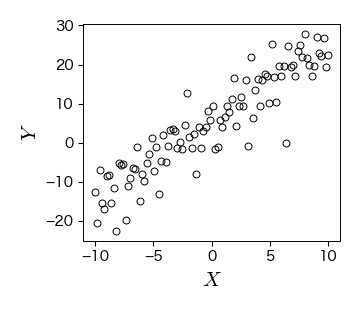

In [15]:
fig, ax = plt.subplots()
ax.plot(x_data, y_data, 'o', mfc='None')
ax.set_xlabel('$X$', fontsize=15)
ax.set_ylabel('$Y$', fontsize=15)

### 最小二乗法

１つの説明変数と目的変数から成る $ n $ 組のデータ $ (x_{i}, y_{i}), \ldots, (x_{n}, y_{n}) $ が与えられたとき，単回帰モデル{eq}`eq:regression_line`を用いてデータから最適な回帰直線を求めることを**単回帰分析**と呼ぶ（説明変数が複数ある場合は重回帰分析と呼ぶ）．
単回帰分析には様々な方法があるが，最も基本的な方法が**最小二乗法**である．

最小二乗法では，予測値 $ \hat{y}_{i}=ax_{i}+b $ と実データ $ y_{i} $ の差の二乗和

$$
	E(a, b) = \sum_{i=1}^{n}(ax_{i}+b-y_{i})^{2}
$$(eq:rss)

が最小となるように回帰係数 $ a,\ b $ を選ぶ．
このとき，$ E $ のことを**残差変動**（残差平方和）と呼ぶ．
残差変動 $ E $ を最小にすることは，$ a,\ b $ を変数とする２次関数 $ E(a, b) $ の最小値を求めることと言い換えられる．
このための必要条件は，残差変動 $ E(a, b) $ の $ a,\ b $ による偏微分がゼロになることである：

$$
	\frac{\partial E}{\partial a} = 0, \hspace{0.5cm} \frac{\partial E}{\partial b} = 0
$$

実際にこれらの条件を適用すると，$ a,\ b $ を変数とする以下の連立方程式が得られる：

\begin{align*}
	\sum_{i=1}^{n} (ax_{i}+b-y_{i})x_{i} &= 0 \\
	\sum_{i=1}^{n} (ax_{i}+b-y_{i}) &= 0
\end{align*}

この連立方程式を解くと，$ a,\ b $ は

\begin{align*}
	a &=\frac{\displaystyle\left(\frac{1}{n}\sum_{i=1}^{n} x_{i}y_{i}\right) - \left(\frac{1}{n} \sum_{i=1}^{n}x_{i}\right)\left(\frac{1}{n}\sum_{i=1}^{n}y_{i}\right)}{\displaystyle \left(\frac{1}{n}\sum_{i=1}^{n} x_{i}^{2}\right) -  \left(\frac{1}{n}\sum_{i=1}^{n}x_{i}\right)^{2}}
	   = \frac{s_{XY}}{s^{2}_{X}} \\[10pt]
	b &= \frac{1}{n} \sum_{i=1}^{n}y_{i} - a\left(\frac{1}{n} \sum_{i=1}^{n}x_{i}\right) = \bar{y} - a \bar{x}
\end{align*}

と求まる．

なお，傾き $ a $ は $X, Y$ の共分散 $ s_{XY} $ を $ X $ の分散 $ s^{2}_{X} $ で割った形になっている（相関係数の式に似ているが違う）．
よって，以下が成り立つ：

- $ s_{XY}>0\quad \Longleftrightarrow\quad a > 0 $　（正の相関）
- $ s_{XY}=0\quad \Longleftrightarrow\quad a = 0 $　（無相関）
- $ s_{XY}<0\quad \Longleftrightarrow\quad a < 0 $　（負の相関）

**pythonによる実装**

In [16]:
# scipy.optimize.curve_fit
def fit_func(x, a, b):
    return a*x + b

p = sp.optimize.curve_fit(fit_func, x_data, y_data)[0]
p

array([1.983, 5.176])

In [17]:
# scipy.optimize.leastsq
def func(p, x, y):
    residual = y - (p[0]*x + p[1])
    return residual
 
p0 = [0, 0]
p = sp.optimize.leastsq(func, p0, args=(x_data, y_data))[0]
p

array([1.983, 5.176])

In [18]:
# 公式から
nume = np.sum(x_data * y_data) - np.sum(x_data) * np.sum(y_data) / x_data.size
denom = np.sum(x_data**2) - (np.sum(x_data)**2)/x_data.size
a = nume / denom
b = np.mean(y_data - a*x_data)
(a, b)

(1.983, 5.176)

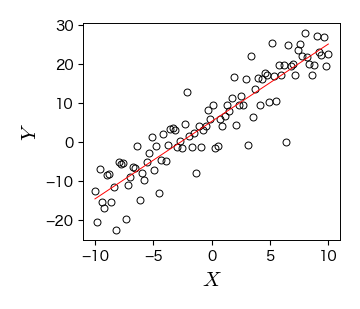

In [21]:
fig, ax = plt.subplots()
ax.plot(x_data, y_data, 'o', mfc='None')
ax.plot(x_data, fit_func(x_data, p[0], p[1]), 'r-', mfc='None')
ax.set_xlabel('$X$', fontsize=15)
ax.set_ylabel('$Y$', fontsize=15)
fig.savefig('./lsm_ex.png', bbox_inches="tight", pad_inches=0.2, transparent=False, dpi=300) # 保存

## 目的変数の変動と決定係数

$ n $ 組のデータ $ (x_{1}, y_{1}), \ldots (x_{n}, y_{n}) $ に対して，次の3つの変動を考える．


- 全変動（データ $ Y $ のばらつき）
  - $\displaystyle S_{y}^{2} = \sum_{i=1}^{n} (y_{i} - \bar{y})^{2}$

- 回帰変動（回帰モデルによる予測値のばらつき）
  - $\displaystyle S_{\hat{y}}^{2} = \sum_{i=1}^{n} (\hat{y}_{i} - \bar{y})^{2}$

- 残差変動（実データと予測値のズレ）
  - $\displaystyle S_{e}^{2} = \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2}$

最小二乗法による単回帰分析の場合，以下の関係が成り立つ：

$$
	S_{y}^{2} = S_{\hat{y}}^{2} + S_{e}^{2}
$$

以上を踏まえ，最小二乗法による回帰直線の当てはまりの良さを

$$
	R^{2} = \frac{S_{\hat{y}}^{2}}{S_{y}^{2}} = 1 - \frac{S_{e}^{2}}{S_{y}^{2}}
$$(eq:R2)

で定義する．
これを**決定係数**と呼ぶ（他の定義もあるので注意）．

最小二乗法による単回帰分析の場合，決定係数は相関係数の２乗に等しく，その定義域は $ 0 \leq R^{2} \leq 1 $ である．
よって，残差変動（分子）が $ 0 $ に近づく（データへの当てはまりが良い）と $ R^{2} $ は $ 1 $ に近づき，残差変動（分子）が大きくなる（データへの当てはまりが悪い）と $ R^{2} $ は $ 0 $ に近づく．

※ 予測値 $ \hat{y} $ が最小二乗法以外の方法によって決められた場合，決定係数が負になることもあり，さらに相関係数の２乗にはならない．

**pythonによる実装**

In [19]:
# 決定係数
R2 = np.var(fit_func(x_data, p[0], p[1])) / np.var(y_data)
R2

0.844

## 実例：都市の平均気温と緯度の関係

### STEP1: Problem
- 地球上では，赤道付近は暑く，極地に近づくほど寒くなる．
- 世界の様々な地域の年間平均気温がどのように決まっているのだろうか？

### STEP2: Plan
- 世界の各地域で年間平均気温は異なっている．
- 各地域での年間平均気温に影響を与える要因は，各地域の地球上での位置，都市の自然環境，人間活動などが考えられ，これらは{numref}`fig:fishbone`のような特性要因図にまとめることができる．
- 以下では，各都市の地球上での位置に関するデータを収集し，年間平均気温との関係を探る．

```{figure} fishbone.png
---
height: 200px
name: fig:fishbone
---
特性要因図
```

### STEP3: Data

- ここでは，理科年表から取得した世界25都市のデータ（[data_25city.csv](https://drive.google.com/uc?export=download&id=1eBbmZSCgVKF61s85kGyrofrLApdO-95J)）を用いる．
- まずはダウンロードしたcsvファイルをpandasのDataFrameに読み込む．
- ここで，T列は年間平均気温，L列は緯度，Z列は標高を表している．

In [28]:
D = pd.read_csv('./data_25city.csv')
D['L2'] = D['L'].abs()  # 絶対緯度
D

,name,T,L,Z,group,L2
0,昭和基地,-10.5,-69.00,18,5,69.00
1,メルボルン,14.5,-37.39,132,4,37.39
2,ブエノスアイレス,17.8,-34.35,25,3,34.35
3,ブリスベン,20.3,-27.23,4,3,27.23
4,リオデジャネイロ,23.9,-22.55,5,2,22.55
...,...,...,...,...,...,...
20,リオン,11.9,45.43,197,4,45.43
21,チューリッヒ,9.4,47.22,555,5,47.22
22,プラハ,8.4,50.06,380,5,50.06
23,ダブリン,9.8,53.26,68,5,53.26


### STEP4: Analysis

**平均気温と緯度の散布図**
- 各都市の標高と平均気温，および緯度と平均気温の散布図を作成し，これらの関係を視覚的に調べる．
- まず，標高と平均気温については特定の関数関係はないため，平均気温とはそれほど関係ないと考えられる．
- 一方，緯度と平均気温には何らかの相関関係がありそうだが，平均気温は緯度に対して上に凸の2次関数のような関係となり，かつ赤道（0度）に対して左右対称になっている．
- このように，散布図がそもそも直線関係となっていない場合には，相関係数を求めるのは不適切である．

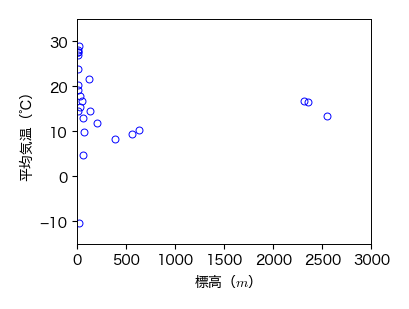

In [53]:
# 標高と平均気温の散布図
fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(D['Z'], D['T'], 'bo', mfc='None')
ax.set_xlim(0, 3000); ax.set_ylim(-15, 35)
ax.set_xlabel('標高（$m$）')
ax.set_ylabel('平均気温（℃）')
fig.savefig('./alt_temp.pdf', bbox_inches="tight", pad_inches=0.2, transparent=False, dpi=300) # 保存

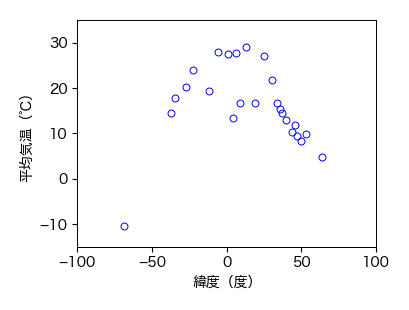

In [54]:
# 緯度と平均気温の散布図
fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(D['L'], D['T'], 'bo', mfc='None')
ax.set_xlim(-100, 100); ax.set_ylim(-15, 35)
ax.set_xlabel('緯度（度）')
ax.set_ylabel('平均気温（℃）')
fig.savefig('./lat_temp.png', bbox_inches="tight", pad_inches=0.2, transparent=False, dpi=300) # 保存

**緯度と平均気温の関数関係**

- 緯度と平均気温の関数関係を特定すれば，散布図が直線関係を示すような適切な変数変換を導ける．
- そこで，緯度の値別に複数のグループに分け，グループ内で平均気温，平均緯度などを求めて関係を調べることにする．
- ここでは25都市を緯度の絶対値の昇順に5都市ずつのグループに分ける：
  1. シンガポール，ボコタ，ジャカルタ，コロンボ，アジスアベバ
  2. リマ，チェンマイ，メキシコ，リオデジャネイロ，ドーハ
  3. ブリスベン，カイロ，ケープタウン，ブエノスアイレス，東京
  4. サンフランシスコ，メルボルン，北京，サラエボ，リオン
  5. チューリッヒ，プラハ，ダブリン，レイキャビク，昭和基地
   
- 各都市が属するグループは，データの'group'列に示されている．

**実習**
- 各群に対し，絶対緯度（L2）の平均，平均気温（T）の平均，平均気温（T）の標準偏差を求めよ
- 絶対緯度の平均を横軸，平均気温の平均を縦軸に取った図をエラーバー付きで描け

In [58]:
# グループごとの集計
D2 = D.groupby('group').mean()  # groupごとの平均
y_err = D.groupby('group').std()['T']  # groupごとの標準偏差

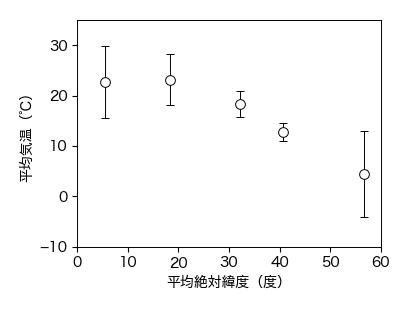

In [42]:
# 平均絶対緯度と平均気温の平均
fig, ax = plt.subplots(figsize=(4, 3))
ax.errorbar(D2['L2'], D2['T'], yerr= y_err,\
            capsize=3, fmt='co', markersize=7, ecolor='k', markeredgecolor='k', markerfacecolor='white')
ax.set_xlim(0, 60); ax.set_ylim(-10, 35)
ax.set_xlabel('平均絶対緯度（度）')
ax.set_ylabel('平均気温（℃）')
fig.savefig('./ave_latitude_temp.png', bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300) # 保存

**実習**
- 横軸に絶対緯度の２乗，縦軸に平均気温を取った散布図を描け
- この散布図に対して，最小二乗法で回帰直線を求めよ
- この散布図に対して，相関係数を求めよ

[-6.108e-03  2.410e+01]


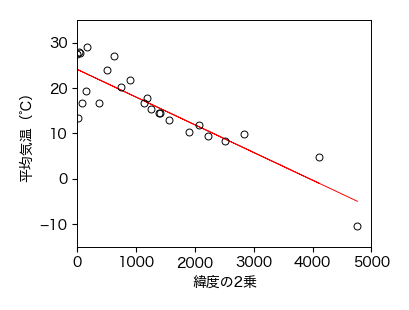

In [46]:
''' 平均気温と緯度の２乗の散布図 '''
fig, ax = plt.subplots(figsize=(4, 3))

# 最小二乗法による回帰直線
p = sp.optimize.curve_fit(fit_func, D['L']**2, D['T'])[0]
print(p)
ax.plot(D['L']**2, fit_func(D['L']**2, p[0], p[1]), 'r-')

# 散布図
ax.plot(D['L']**2, D['T'], 'ko', mfc='None')
ax.set_xlim(0, 5000); ax.set_ylim(-15, 35)
ax.set_xlabel('緯度の2乗')
ax.set_ylabel('平均気温（℃）')
fig.savefig('./lat2_temp.pdf', bbox_inches="tight", pad_inches=0.2, transparent=False, dpi=300) # 保存

In [47]:
# 相関係数
np.corrcoef(D['L']**2, D['T'])

array([[ 1.   , -0.877],
       [-0.877,  1.   ]])

### STEP5: Conclusion
- 各都市の年間平均気温と緯度の関係を散布図によって調べた結果，緯度の２乗に対して直線関係があることが分かった．
- 一方，年間平均気温が緯度の2次関数になるということは，緯度が高くなれば気温もいくらでも大きくなることを意味し，やや奇妙である．

**実習**
- 緯度$ \theta $における太陽エネルギーは$ \cos\theta $に比例することが知られている．これより，年間平均気温と緯度を結びつける，より適切な関数を求めよ．
- テイラー展開の観点から，2次関数の妥当性を議論せよ．

[ 44.315 -19.923]


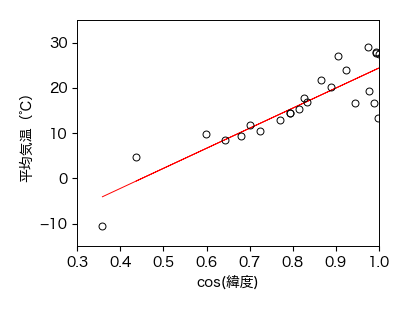

In [51]:
''' 平均気温とcos(緯度)の散布図 '''
fig, ax = plt.subplots(figsize=(4, 3))

# 最小二乗法による回帰直線
p = sp.optimize.curve_fit(fit_func, np.cos(np.radians(D['L'])), D['T'])[0]
print(p)
ax.plot(np.cos(np.radians(D['L'])), fit_func(np.cos(np.radians(D['L'])), p[0], p[1]), 'r-')

# 散布図
ax.plot(np.cos(np.radians(D['L'])), D['T'], 'ko', mfc='None')
ax.set_xlim(0.3, 1); ax.set_ylim(-15, 35)
ax.set_xlabel('cos(緯度)')
ax.set_ylabel('平均気温（℃）')
fig.savefig('./cos_lat_temp.pdf', bbox_inches="tight", pad_inches=0.2, transparent=False, dpi=300) # 保存

In [52]:
# 相関係数
np.corrcoef(np.cos(np.radians(D['L'])), D['T'])

array([[1.   , 0.874],
       [0.874, 1.   ]])

---
### STEP 6: Problem 2
- 緯度の2乗と平均気温の散布図を見ると，直線関係から少し外れる都市がいくつかあることが分かる．
- これらの都市は，外れ値の大きい順にボコダ，メキシコ，アジスアベバ，である．
- では，これらの都市はなぜ直線関係から外れるのだろうか？

### STEP 7: Plan & Data 2
- 直線から外れている都市についてのデータを見ると，ある共通点が浮かび上がる．
- それは，標高が高いことである（いずれも標高2000m以上）．
- 一般的に，標高が高くなるほど都市の気温は低くなる．
- よって，平均気温と緯度の関係を見るためには，標高の影響を調整する必要がある．
- 一般に，標高が100m高くなると，気温は0.6℃低くなると言われている．
- これより，平均気温（$ T $）に対して標高（$ z $）の影響を調整した気温（高度調整済み平均気温）は
    $$ T_{0}=T+0.006z 
    $$
  と表される．

### STEP 8: Analysis 2

**実習**
- 緯度の２乗，$\cos(緯度)$と高度調整済み平均気温の散布図を描け
- この散布図から相関係数を求めよ
- この散布図に対して回帰直線を引き，直線の式を求めよ

In [59]:
# 高度調整済み平均気温
D['T0'] = D['T'] + 0.006 * D['Z']

[-7.095e-03  2.766e+01]


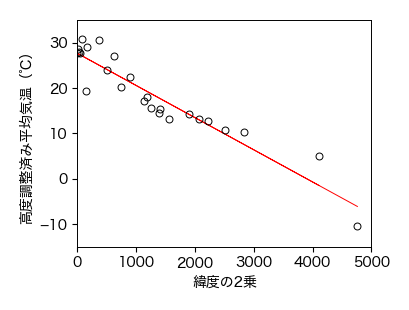

In [61]:
''' 高度調整済み平均気温と緯度の２乗の散布図 '''
fig, ax = plt.subplots(figsize=(4, 3))

# 最小二乗法による回帰直線
p = sp.optimize.curve_fit(fit_func, D['L']**2, D['T0'])[0]
print(p)
ax.plot(D['L']**2, fit_func(D['L']**2, p[0], p[1]), 'r-')

# 散布図
ax.plot(D['L']**2, D['T0'], 'ko', mfc='None')
ax.set_xlim(0, 5000); ax.set_ylim(-15, 35)
ax.set_xlabel('緯度の2乗')
ax.set_ylabel('高度調整済み平均気温（℃）')
fig.savefig('./lat2_temp0.pdf', bbox_inches="tight", pad_inches=0.2, transparent=False, dpi=300) # 保存

In [62]:
# 相関係数
np.corrcoef(D['L']**2, D['T0'])

array([[ 1.   , -0.943],
       [-0.943,  1.   ]])

[ 51.693 -23.651]


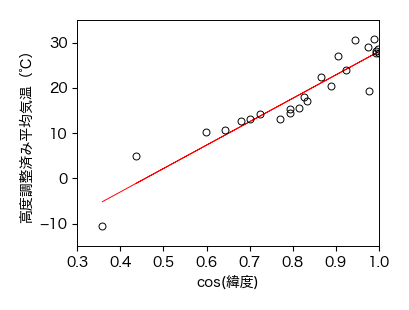

In [64]:
''' 高度調整済み平均気温とcos(緯度)の散布図 '''
fig, ax = plt.subplots(figsize=(4, 3))

# 最小二乗法による回帰直線
p = sp.optimize.curve_fit(fit_func, np.cos(np.radians(D['L'])), D['T0'])[0]
print(p)
ax.plot(np.cos(np.radians(D['L'])), fit_func(np.cos(np.radians(D['L'])), p[0], p[1]), 'r-')

# 散布図
ax.plot(np.cos(np.radians(D['L'])), D['T0'], 'ko', mfc='None')
ax.set_xlim(0.3, 1); ax.set_ylim(-15, 35)
ax.set_xlabel('cos(緯度)')
ax.set_ylabel('高度調整済み平均気温（℃）')
fig.savefig('./cos_lat_temp2.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300) # 保存

In [65]:
# 相関係数
np.corrcoef(np.cos(np.radians(D['L'])), D['T0'])

array([[1.   , 0.944],
       [0.944, 1.   ]])

### STEP 9: Conclusion 2
- 年間平均気温と緯度の2乗の関係において発生する外れ値は，標高の影響によるものであることが分かった．
- そこで，標高の影響を調整することで，年間平均気温，緯度，標高に対する適切な関数を推定することができた．